In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os

BASE_DIR = "/content/drive/MyDrive/ds_aditi_veer"

folders = [
    BASE_DIR,
    f"{BASE_DIR}/csv_files",
    f"{BASE_DIR}/outputs",
]

for f in folders:
    os.makedirs(f, exist_ok=True)

print("Project structure created at:", BASE_DIR)

Project structure created at: /content/drive/MyDrive/ds_aditi_veer


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

trades_df = pd.read_csv("/content/hyperliquid_trades.csv")
sentiment_df = pd.read_csv("/content/fear_greed_index.csv")

trades_df.head(), sentiment_df.head()

/tmp/ipython-input-3202181118.py:6: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  trades_df = pd.read_csv("/content/hyperliquid_trades.csv")


(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side     Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY  02-12-2024 22:50        0.000000       Buy   
 1        16.00    127.68  BUY  02-12-2024 22:50      986.524596       Buy   
 2       144.09   1150.63  BUY  02-12-2024 22:50     1002.518996       Buy   
 3       142.98   1142.04  BUY  02-12-2024 22:50     1146.558564       Buy   
 4         8.73     69.75  BUY  02-12-2024 22:50     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash  \
 0         0.0  0xec0

In [12]:
print(trades_df.columns)
print(sentiment_df.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [13]:
sentiment_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB


In [14]:
trades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88467 entries, 0 to 88466
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account           88467 non-null  object 
 1   Coin              88466 non-null  object 
 2   Execution Price   88466 non-null  float64
 3   Size Tokens       88466 non-null  float64
 4   Size USD          88466 non-null  float64
 5   Side              88466 non-null  object 
 6   Timestamp IST     88466 non-null  object 
 7   Start Position    88466 non-null  float64
 8   Direction         88466 non-null  object 
 9   Closed PnL        88466 non-null  float64
 10  Transaction Hash  88466 non-null  object 
 11  Order ID          88466 non-null  float64
 12  Crossed           88466 non-null  object 
 13  Fee               88466 non-null  float64
 14  Trade ID          88466 non-null  float64
 15  Timestamp         88466 non-null  float64
dtypes: float64(9), object(7)
memory usage: 1

In [15]:
print(sentiment_df.columns)
print(trades_df.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')
Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [16]:
def clean_columns(df):
    df.columns = (
        df.columns
        .str.strip()
        .str.lower()
        .str.replace(' ', '_')
        .str.replace('-', '_')
    )
    return df

In [17]:
sentiment_df = clean_columns(sentiment_df)
trades_df = clean_columns(trades_df)

In [18]:
print("Sentiment columns:")
print(sentiment_df.columns)

Sentiment columns:
Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [19]:
print("\nTrader columns:")
print(trades_df.columns)


Trader columns:
Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp'],
      dtype='object')


In [20]:
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s')
sentiment_df['date'] = sentiment_df['timestamp'].dt.date

In [21]:
sentiment_df.head()

,timestamp,value,classification,date
0,2018-02-01 05:30:00,30,Fear,2018-02-01
1,2018-02-02 05:30:00,15,Extreme Fear,2018-02-02
2,2018-02-03 05:30:00,40,Fear,2018-02-03
3,2018-02-04 05:30:00,24,Extreme Fear,2018-02-04
4,2018-02-05 05:30:00,11,Extreme Fear,2018-02-05


In [22]:
trades_df['timestamp_ist'] = pd.to_datetime(trades_df['timestamp_ist'], format="%d-%m-%Y %H:%M")
trades_df['date'] = trades_df['timestamp_ist'].dt.date

In [23]:
trades_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02


In [24]:
merged_df = trades_df.merge(
    sentiment_df[['date', 'classification']],
    on='date',
    how='left'
)

In [25]:
merged_df = merged_df.rename(columns={'classification': 'sentiment'})

In [26]:
merged_df.head()

,account,coin,execution_price,size_tokens,size_usd,side,timestamp_ist,start_position,direction,closed_pnl,transaction_hash,order_id,crossed,fee,trade_id,timestamp,date,sentiment
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,2024-12-02 22:50:00,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.345404,8.950000e+14,1.730000e+12,2024-12-02,Extreme Greed
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,2024-12-02 22:50:00,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.005600,4.430000e+14,1.730000e+12,2024-12-02,Extreme Greed
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,2024-12-02 22:50:00,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050431,6.600000e+14,1.730000e+12,2024-12-02,Extreme Greed
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,2024-12-02 22:50:00,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.050043,1.080000e+15,1.730000e+12,2024-12-02,Extreme Greed
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,2024-12-02 22:50:00,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,5.201771e+10,True,0.003055,1.050000e+15,1.730000e+12,2024-12-02,Extreme Greed


In [27]:
merged_df['notional'] = merged_df['execution_price'] * merged_df['size_tokens']

In [28]:
merged_df['notional'] = merged_df['notional'].replace(0, np.nan)

In [29]:
merged_df['return_pct'] = merged_df['closed_pnl'] / merged_df['notional']

In [30]:
merged_df['direction'] = merged_df['direction'].str.title()

In [31]:
merged_df[['sentiment', 'closed_pnl', 'return_pct']].head()
merged_df['sentiment'].value_counts(dropna=False)

,count
sentiment,
Fear,30657
Greed,20214
Neutral,15941
Extreme Greed,14213
Extreme Fear,7435
NaN,7


In [32]:
sentiment_stats = merged_df.groupby('sentiment').agg({
    'closed_pnl': ['mean', 'sum'],
    'return_pct': 'mean',
    'direction': lambda x: x.value_counts(normalize=True)
})

sentiment_stats

closed_pnl               return_pct  \
                     mean           sum       mean   
sentiment                                            
Extreme Fear    76.680902  5.701225e+05   0.010235   
Extreme Greed  121.900517  1.732572e+06   0.031970   
Fear            81.463878  2.497438e+06   0.017338   
Greed           77.679216  1.570208e+06   0.029100   
Neutral         71.859323  1.145509e+06   0.020003   

                                                       direction  
                                                        <lambda>  
sentiment                                                         
Extreme Fear   [0.47182246133154, 0.3362474781439139, 0.06240...  
Extreme Greed  [0.2819953563638922, 0.23471469781186238, 0.17...  
Fear           [0.3472290178425808, 0.3433799784714747, 0.108...  
Greed          [0.2648164638369447, 0.2424062530919165, 0.198...  
Neutral        [0.2688664450159965, 0.24747506429960478, 0.15...

In [33]:
print(merged_df.columns)

Index(['account', 'coin', 'execution_price', 'size_tokens', 'size_usd', 'side',
       'timestamp_ist', 'start_position', 'direction', 'closed_pnl',
       'transaction_hash', 'order_id', 'crossed', 'fee', 'trade_id',
       'timestamp', 'date', 'sentiment', 'notional', 'return_pct'],
      dtype='object')


In [34]:
sentiment_stats = merged_df.groupby('sentiment').agg({
    'closed_pnl': ['mean', 'sum', 'count'],
    'return_pct': 'mean',
    'size_tokens': 'mean',
    'size_usd': 'mean',
    'direction': lambda x: x.value_counts(normalize=True)
})

sentiment_stats

closed_pnl                      return_pct   size_tokens  \
                     mean           sum  count       mean          mean   
sentiment                                                                 
Extreme Fear    76.680902  5.701225e+05   7435   0.010235   3713.697173   
Extreme Greed  121.900517  1.732572e+06  14213   0.031970  19697.921194   
Fear            81.463878  2.497438e+06  30657   0.017338   4432.554380   
Greed           77.679216  1.570208e+06  20214   0.029100   6970.324507   
Neutral         71.859323  1.145509e+06  15941   0.020003   5987.822376   

                   size_usd                                          direction  
                       mean                                           <lambda>  
sentiment                                                                       
Extreme Fear    5266.810243  [0.47182246133154, 0.3362474781439139, 0.06240...  
Extreme Greed   5961.550044  [0.2819953563638922, 0.23471469781186238, 0.17...  
Fear           10797.609767  [0.3472290178425808, 0.3433799784714747, 0.108...  
Greed          11204.017334  [0.2648164638369447, 0.2424062530919165, 0.198...  
Neutral         8011.832792  [0.2688664450159965, 0.24747506429960478, 0.15...

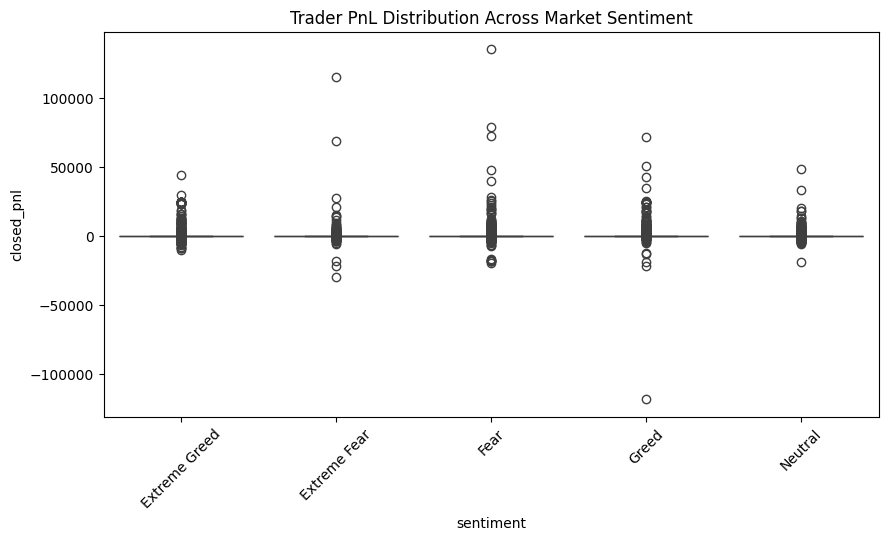

In [35]:
plt.figure(figsize=(10,5))
sns.boxplot(data=merged_df, x='sentiment', y='closed_pnl')
plt.title("Trader PnL Distribution Across Market Sentiment")
plt.xticks(rotation=45)
plt.show()

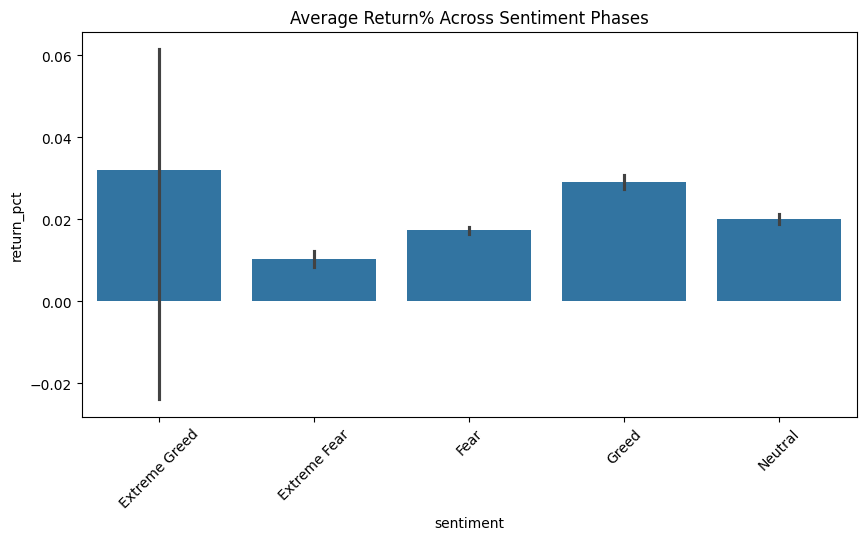

In [36]:
plt.figure(figsize=(10,5))
sns.barplot(data=merged_df, x='sentiment', y='return_pct')
plt.title("Average Return% Across Sentiment Phases")
plt.xticks(rotation=45)
plt.show()

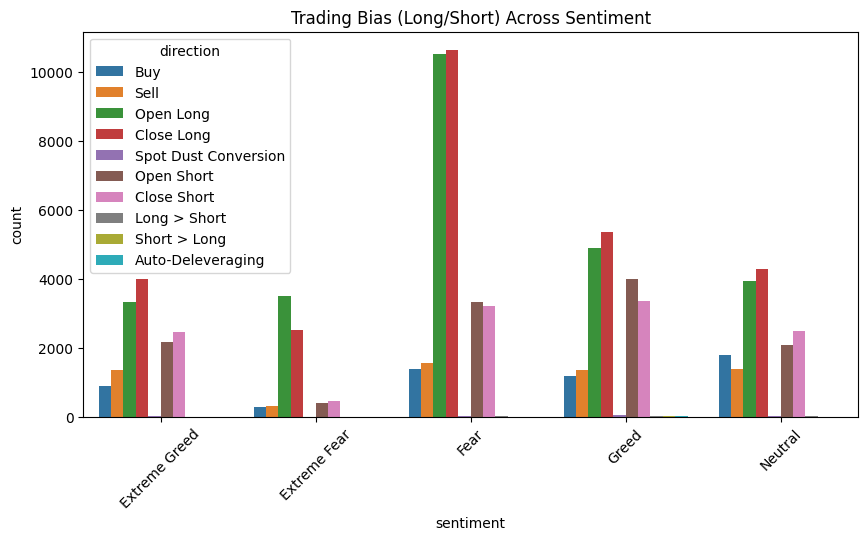

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(data=merged_df, x='sentiment', hue='direction')
plt.title("Trading Bias (Long/Short) Across Sentiment")
plt.xticks(rotation=45)
plt.show()

In [38]:
merged_df['win'] = merged_df['closed_pnl'] > 0

winrate = merged_df.groupby('sentiment')['win'].mean().sort_values(ascending=False)
winrate

,win
sentiment,
Extreme Greed,0.510589
Neutral,0.465655
Fear,0.459764
Greed,0.407243
Extreme Fear,0.370679


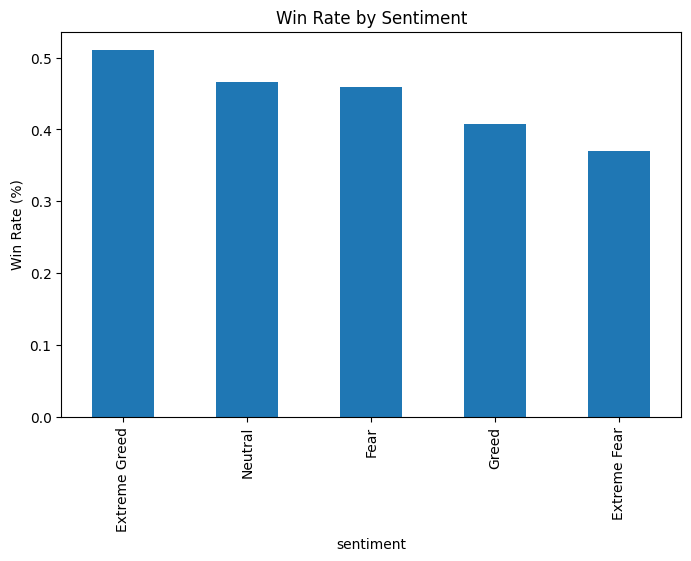

In [39]:
winrate.plot(kind='bar', figsize=(8,5))
plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate (%)")
plt.show()

In [40]:
longshort_stats = merged_df.groupby(['sentiment', 'direction'])['closed_pnl'].mean()
longshort_stats

sentiment      direction           
Extreme Fear   Buy                         0.000000
               Close Long                134.438846
               Close Short               694.268394
               Open Long                   0.000000
               Open Short                  0.000000
               Sell                     -236.150759
               Short > Long           -17742.216550
Extreme Greed  Buy                         0.000000
               Close Long                 63.593943
               Close Short                57.945751
               Long > Short              416.833220
               Open Long                   0.000000
               Open Short                  0.000000
               Sell                      996.201612
               Short > Long               92.500200
               Spot Dust Conversion        0.000000
Fear           Buy                         0.000000
               Close Long                 95.929552
               Close Short               457.026125
               Long > Short              388.829704
               Open Long                   0.000000
               Open Short                  0.000000
               Sell                       -2.467891
               Short > Long             5257.088246
               Spot Dust Conversion        0.000000
Greed          Auto-Deleveraging        7184.807003
               Buy                         0.000000
               Close Long                 98.664763
               Close Short               164.348092
               Long > Short               25.082265
               Open Long                   0.000000
               Open Short                  0.000000
               Sell                      315.721786
               Short > Long              163.851243
               Spot Dust Conversion        0.000000
Neutral        Buy                         0.000000
               Close Long                 77.816432
               Close Short               249.437685
               Long > Short              219.645230
               Open Long                   0.000000
               Open Short                  0.000000
               Sell                      140.727514
               Short > Long              100.950700
               Spot Dust Conversion        0.000000
Name: closed_pnl, dtype: float64

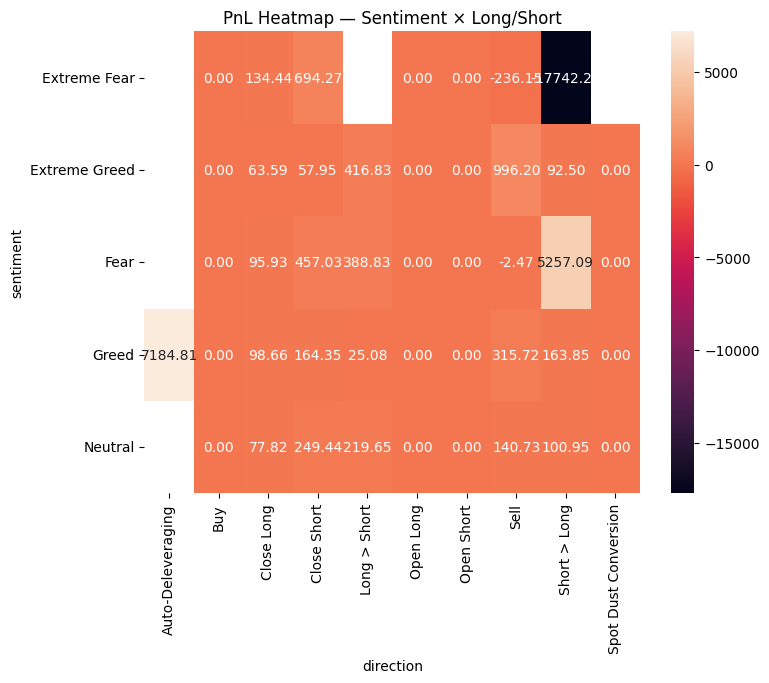

In [41]:
pivot_ls = merged_df.pivot_table(
    values='closed_pnl',
    index='sentiment',
    columns='direction',
    aggfunc='mean'
)

plt.figure(figsize=(8,6))
sns.heatmap(pivot_ls, annot=True, fmt=".2f")
plt.title("PnL Heatmap — Sentiment × Long/Short")
plt.show()

In [42]:
OUTPUT_DIR = "/content/drive/MyDrive/ds_aditi_veer/outputs"

In [43]:
import os
os.makedirs(OUTPUT_DIR, exist_ok=True)

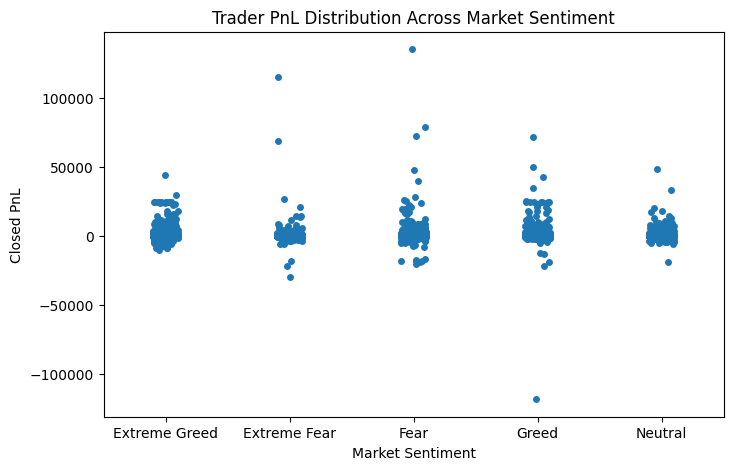

In [44]:
plt.figure(figsize=(8, 5))
sns.stripplot(
    x="sentiment",
    y="closed_pnl",
    data=merged_df,
    jitter=True
)

plt.title("Trader PnL Distribution Across Market Sentiment")
plt.xlabel("Market Sentiment")
plt.ylabel("Closed PnL")

plt.savefig(
    f"{OUTPUT_DIR}/pnl_distribution_sentiment.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()


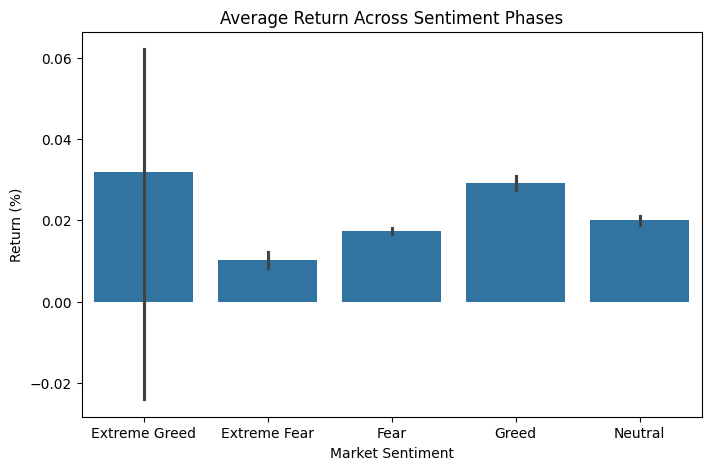

In [45]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x="sentiment",
    y="return_pct",
    data=merged_df
)

plt.title("Average Return Across Sentiment Phases")
plt.xlabel("Market Sentiment")
plt.ylabel("Return (%)")

plt.savefig(
    f"{OUTPUT_DIR}/avg_return_sentiment.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

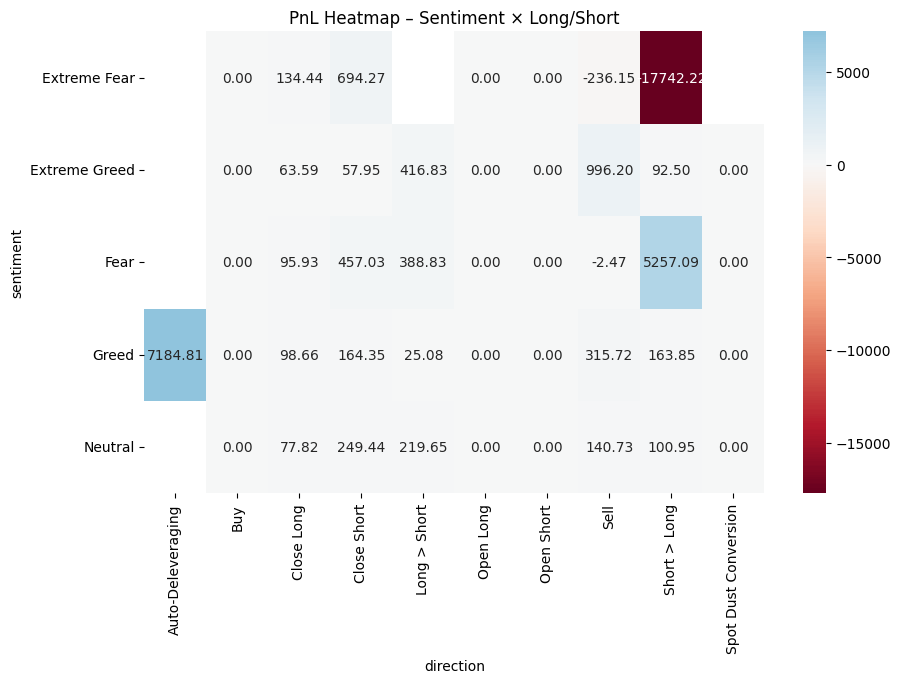

In [46]:
heatmap_data = merged_df.pivot_table(
    values="closed_pnl",
    index="sentiment",
    columns="direction",
    aggfunc="mean"
)

plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt=".2f",
    cmap="RdBu",
    center=0
)

plt.title("PnL Heatmap – Sentiment × Long/Short")

plt.savefig(
    f"{OUTPUT_DIR}/pnl_heatmap_sentiment_direction.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

In [47]:
merged_df['profit_flag'] = (merged_df['closed_pnl'] > 0).astype(int)

In [48]:
win_rate = (
    merged_df
    .groupby("sentiment")["profit_flag"]
    .mean()
    .reset_index()
)

win_rate

,sentiment,profit_flag
0,Extreme Fear,0.370679
1,Extreme Greed,0.510589
2,Fear,0.459764
3,Greed,0.407243
4,Neutral,0.465655


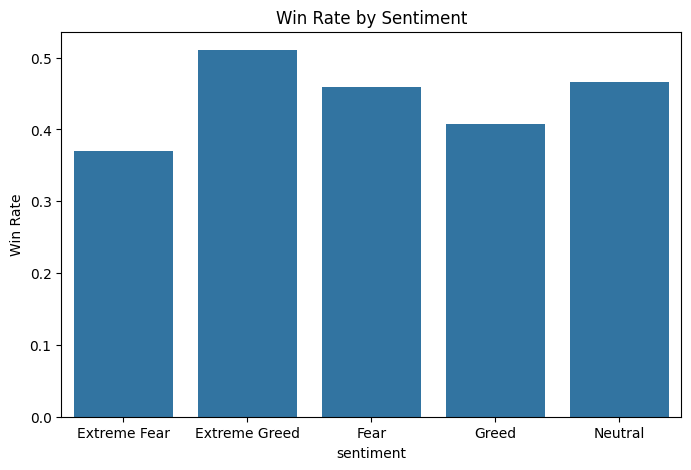

In [49]:
plt.figure(figsize=(8, 5))
sns.barplot(
    x="sentiment",
    y="profit_flag",
    data=win_rate
)

plt.title("Win Rate by Sentiment")
plt.ylabel("Win Rate")

plt.savefig(
    "/content/drive/MyDrive/ds_aditi_veer/outputs/win_rate_sentiment.png",
    bbox_inches="tight",
    dpi=300
)
plt.show()

In [50]:
CSV_DIR = "/content/drive/MyDrive/ds_aditi_veer/csv_files"
os.makedirs(CSV_DIR, exist_ok=True)

In [51]:
trades_df.to_csv(
    f"{CSV_DIR}/hyperliquid_cleaned.csv",
    index=False
)

In [52]:
sentiment_df.to_csv(
    f"{CSV_DIR}/sentiment_cleaned.csv",
    index=False
)

In [53]:
merged_df.to_csv(
    f"{CSV_DIR}/merged_data.csv",
    index=False
)

In [55]:
print("Cleaned CSV files saved successfully!")
print(os.listdir(CSV_DIR))

Cleaned CSV files saved successfully!
['hyperliquid_cleaned.csv', 'sentiment_cleaned.csv', 'merged_data.csv']
